<a href="https://colab.research.google.com/github/hanlinz-star/Exercise-2/blob/main/Exercise2_Hanlin_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bus Delay Prediction**

1.Import the data

In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


In [5]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

<Axes: xlabel='Arrival_delay', ylabel='Count'>

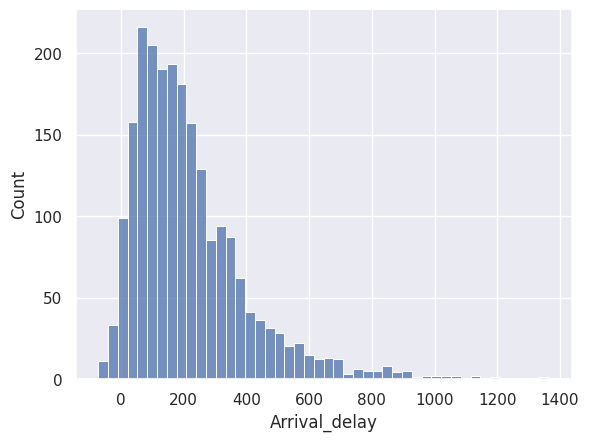

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['Arrival_delay'])

In [7]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

,Arrival_delay
Arrival_delay,1.000000
Upstream_stop_delay,0.993935
Dwell_time,0.218745
Recurrent_delay,0.162692
Scheduled_travel_time,0.100695


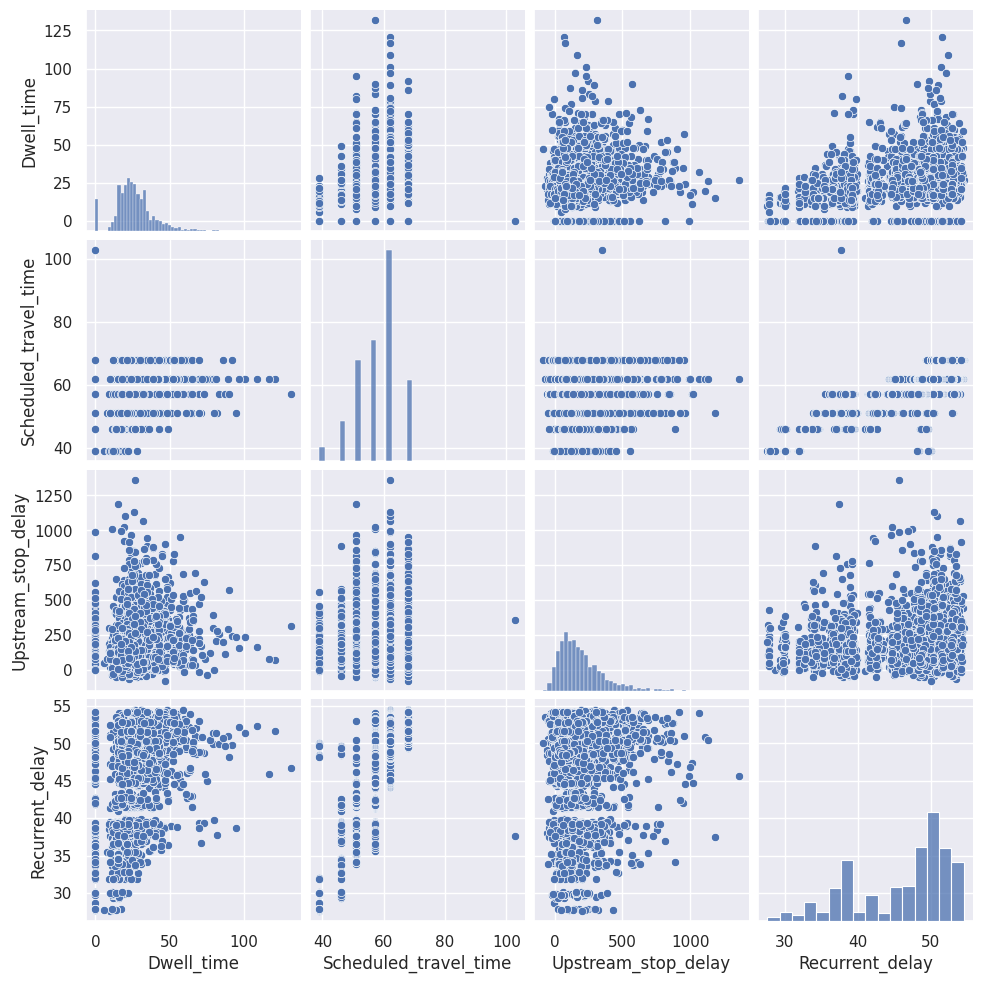

In [8]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

sns.pairplot(x)

2.LinearRegression

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9.654193995146553
Mean Squared Error: 176.3735387676195
R-squared: 0.9940853862137997


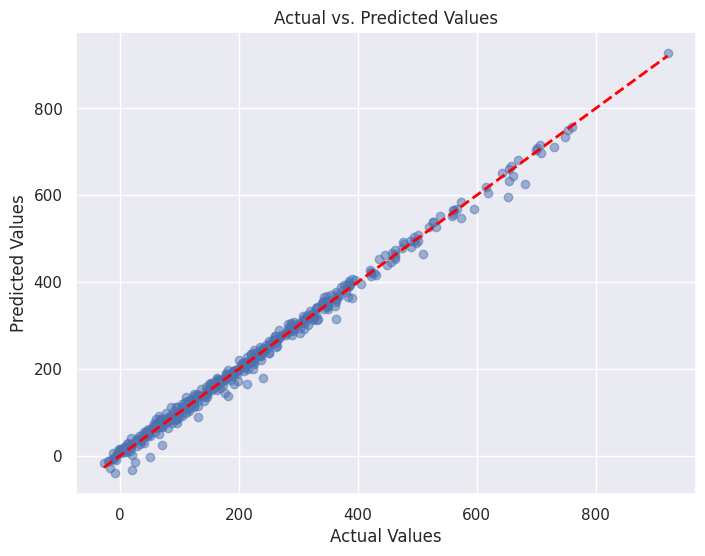

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

plt.show()

2.SVR

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [ 1, 10],
    'epsilon': [ 1, 10]
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.1s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.1s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.1s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.1s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.1s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.1s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.1s
[CV] END .....................C=1, epsilon=10, ke

In [16]:
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])
best_svr.fit(X_train, y_train)

SVR(C=10, epsilon=10, kernel='linear')

In [17]:
y_pred = best_svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9.467682213669569
Mean Squared Error: 175.67689280541913
R-squared: 0.9941087479484506


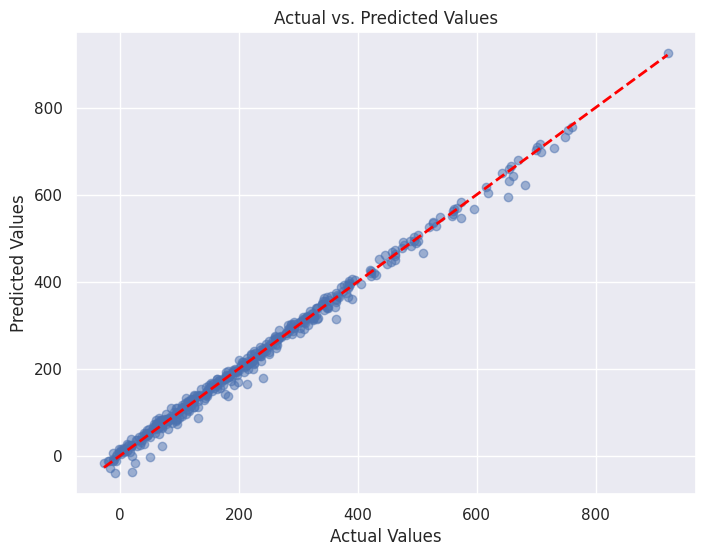

In [18]:
# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

3.XGBOOST

In [19]:
pip install xgboost

In [20]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
target_col = "Arrival_delay"
X = df.drop(columns=[target_col])
y = df[target_col]

In [22]:
categorical_cols = [c for c in X.columns if X[c].dtype=='object' or str(X[c].dtype).startswith('category')]
numeric_cols = [c for c in X.columns if c not in categorical_cols]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [24]:
preprocess_xgb = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ("num", "passthrough", numeric_cols),
])

xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb_pipe = Pipeline([
    ("prep", preprocess_xgb),
    ("model", xgb)
])

In [25]:
param_grid = {
    "model__n_estimators": [300, 600, 1000],
    "model__max_depth": [4, 6, 8],
    "model__learning_rate": [0.03, 0.05, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],
}

grid = GridSearchCV(
    xgb_pipe, param_grid,
    cv=3, scoring="neg_mean_absolute_error",
    n_jobs=-1, verbose=0
)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         []),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['Dwell_time',
                                                                          'Scheduled_travel_time',
                                                                          'Upstream_stop_delay',
                                                                          'Recurrent_delay'])])),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     c...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=-1,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.8, 1.0],
                         'model__learning_rate': [0.03, 0.05, 0.1],
                         'model__max_depth': [4, 6, 8],
                         'model__n_estimators': [300, 600, 1000],
                         'model__subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error')

In [26]:
best_xgb = grid.best_estimator_
y_pred = best_xgb.predict(X_test)

In [28]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("Best params:", grid.best_params_)
print(f"XGBoost →  MAE: {mae:.3f}  |  RMSE: {rmse:.3f}  |  R²: {r2:.3f}")

Best params: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.03, 'model__max_depth': 4, 'model__n_estimators': 300, 'model__subsample': 0.8}
XGBoost →  MAE: 10.482  |  RMSE: 14.444  |  R²: 0.993


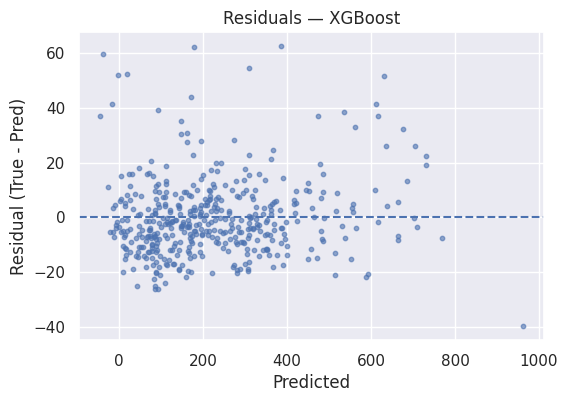

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred, y_test - y_pred, s=10, alpha=0.6)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residual (True - Pred)")
plt.title("Residuals — XGBoost")
plt.show()

In [31]:
prep = best_xgb.named_steps['prep']
model = best_xgb.named_steps['model']

cat_cols, num_cols, ohe = [], [], None
for name, trans, cols in prep.transformers_:
    if name == 'cat':
        cat_cols = list(cols)
        ohe = prep.named_transformers_.get('cat', None)
    elif name == 'num':
        num_cols = list(cols)

if ohe is not None and isinstance(ohe, OneHotEncoder) and len(cat_cols) > 0:
    if hasattr(ohe, 'get_feature_names_out'):
        cat_out = ohe.get_feature_names_out(cat_cols)
    else:
        cat_out = ohe.get_feature_names(cat_cols)
else:
    cat_out = np.array([])

feature_names = np.r_[cat_out, num_cols]

importances = model.feature_importances_
imp_df = (pd.DataFrame({'feature': feature_names, 'importance': importances})
            .sort_values('importance', ascending=False)
            .head(20))
display(imp_df)

,feature,importance
2,Upstream_stop_delay,0.985181
0,Dwell_time,0.010610
3,Recurrent_delay,0.002468
1,Scheduled_travel_time,0.001741


**Bike Sharing Demand Prediction**

1.Import the data

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BikeSharing.csv"
df = pd.read_csv(url)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
from sklearn.model_selection import train_test_split
target = 'cnt'
features = [
    'temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr'
]

X = df[features].copy()
y = df[target].astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

2.LinearRegression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
mae_lr  = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr   = r2_score(y_test, y_pred_lr)

n, p = X_test.shape
adj_r2_lr = 1 - (1 - r2_lr) * (n - 1) / (n - p - 1)

print(f"[Linear] MAE={mae_lr:.3f} | RMSE={rmse_lr:.3f} | R²={r2_lr:.3f} | Adjusted R²={adj_r2_lr:.3f}")


[Linear] MAE=104.796 | RMSE=139.210 | R²=0.388 | Adjusted R²=0.386


In [4]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3.SVR

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [ 1, 10],
    'epsilon': [ 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   7.6s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   6.2s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   7.1s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   6.2s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   7.1s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   9.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   8.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   9.1s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   9.1s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   8.1s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   6.6s
[CV] END .....................C=1, epsilon=10, ke

In [6]:
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])
best_svr.fit(X_train, y_train)


SVR(C=10, epsilon=10)

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = best_svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 79.97929783472864
Mean Squared Error: 16547.571712068584
R-squared: 0.47742438788353314


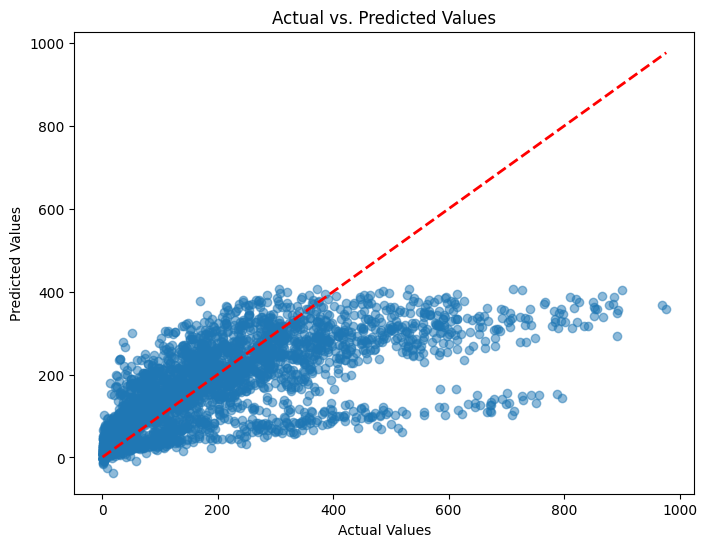

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

plt.show()

3.XGBOOST

In [11]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
cat_candidates = ['weathersit','hr','weekday','workingday','holiday','season','yr']
cat_cols = [c for c in cat_candidates if c in X.columns]
num_cols = [c for c in X.columns if c not in cat_cols]

In [13]:
pre_xgb = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols),
])

xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9
)

xgb_pipe = Pipeline([
    ('prep', pre_xgb),
    ('model', xgb)
])

In [14]:
param_grid = {
    'model__n_estimators': [300, 600, 1000],
    'model__max_depth': [4, 6, 8],
    'model__learning_rate': [0.03, 0.05, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
}

grid_xgb = GridSearchCV(
    xgb_pipe, param_grid,
    cv=3, scoring='neg_mean_absolute_error',
    n_jobs=-1, verbose=0
)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

In [16]:
mae_xgb  = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # 兼容所有 sklearn 版本
r2_xgb   = r2_score(y_test, y_pred_xgb)
print("XGBoost best params:", grid_xgb.best_params_)
print(f"[XGBoost] MAE={mae_xgb:.3f} | RMSE={rmse_xgb:.3f} | R²={r2_xgb:.3f}")

XGBoost best params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.03, 'model__max_depth': 8, 'model__n_estimators': 1000, 'model__subsample': 0.8}
[XGBoost] MAE=27.190 | RMSE=43.949 | R²=0.939


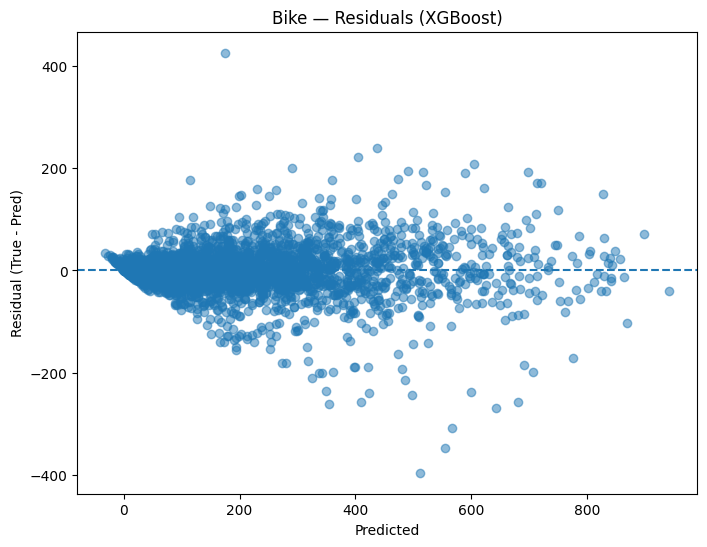

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_pred_xgb, y_test - y_pred_xgb, alpha=0.5)
plt.axhline(0, ls='--')
plt.xlabel("Predicted"); plt.ylabel("Residual (True - Pred)")
plt.title("Bike — Residuals (XGBoost)")
plt.show()

In [18]:
prep = best_xgb.named_steps['prep']
model = best_xgb.named_steps['model']
ohe = prep.named_transformers_.get('cat', None)

if ohe is not None and len(cat_cols) > 0:
    try:
        cat_out = ohe.get_feature_names_out(cat_cols)
    except:
        cat_out = ohe.get_feature_names(cat_cols)
    feature_names = np.r_[cat_out, num_cols]
else:
    feature_names = np.array(num_cols)

imp_df = (pd.DataFrame({'feature': feature_names,
                        'importance': model.feature_importances_})
            .sort_values('importance', ascending=False)
            .head(20))
try:
    from IPython.display import display
    display(imp_df)
except:
    print(imp_df)

,feature,importance
21,hr_17,0.103769
7,hr_3,0.086968
8,hr_4,0.083156
22,hr_18,0.078891
5,hr_1,0.072317
6,hr_2,0.070424
9,hr_5,0.066696
4,hr_0,0.063651
12,hr_8,0.062077
27,hr_23,0.028967
